In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import style 
import seaborn as sns 
import pandas_profiling as pdp
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.1.1/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.1.1/u/import-error

In [2]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
import xgboost as xgb 
import lightgbm as lgbm 
import catboost as cb 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import train_test_split,cross_validate 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv(r"C:\Users\Mukes\Project\Dataset\healthcare-dataset-stroke-data.csv")
df. head ()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df. shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<Axes: xlabel='smoking_status', ylabel='age'>

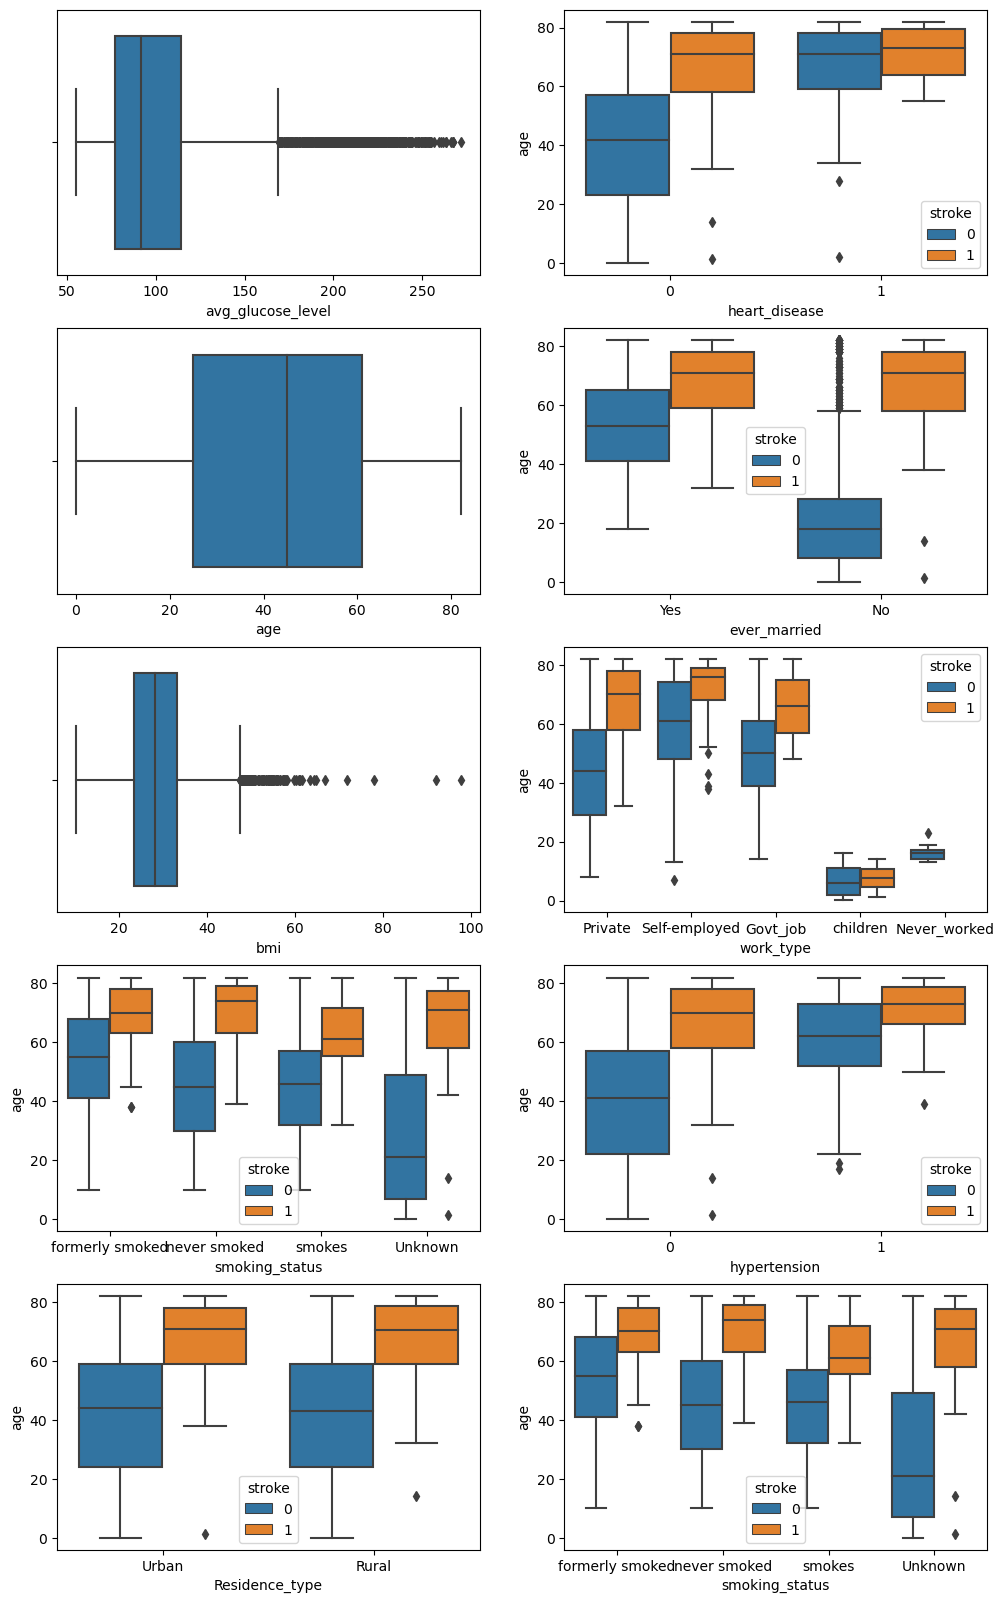

In [6]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (12, 20))
sns.boxplot(x = 'avg_glucose_level', data = df, ax=axes [0][0])
sns.boxplot(x = 'age', data = df, ax=axes [1][0])
sns.boxplot(x = 'bmi', data = df, ax=axes [2][0])
sns.boxplot(x = 'smoking_status',y = 'age', hue = 'stroke',data = df, ax=axes[3][0])
sns.boxplot(x = 'hypertension', y ='age', hue = 'stroke', data = df, ax=axes[3] [1])
sns.boxplot(x = 'heart_disease',y = 'age', hue = 'stroke', data = df, ax=axes [0][1])
sns.boxplot(x = 'ever_married',y = 'age', hue = 'stroke', data = df, ax=axes [1][1])
sns.boxplot(x = 'work_type',y = 'age',hue = 'stroke', data = df, ax=axes[2][1])
sns.boxplot(x = 'Residence_type', y ='age', hue = 'stroke',data = df, ax = axes[4][0]) 
sns.boxplot(x = 'smoking_status', y = 'age', hue = 'stroke',data = df,ax = axes [4][1])

<Axes: xlabel='stroke', ylabel='smoking_status'>

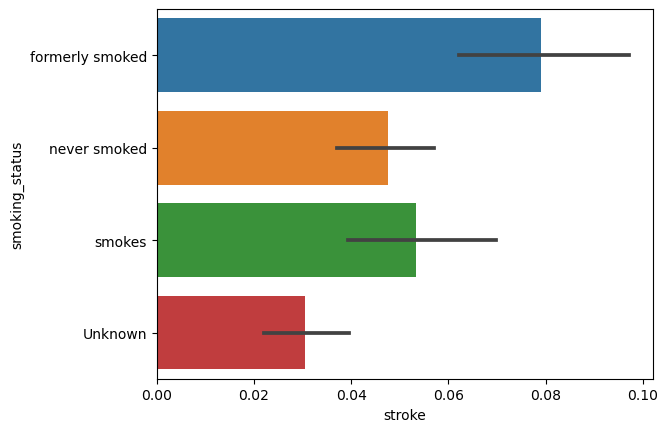

In [7]:
sns.barplot(x = 'stroke' ,y='smoking_status', data = df)

In [8]:
replace_values = {'Unknown': 'never smoked'}
df = df.replace({'smoking_status' : replace_values})
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


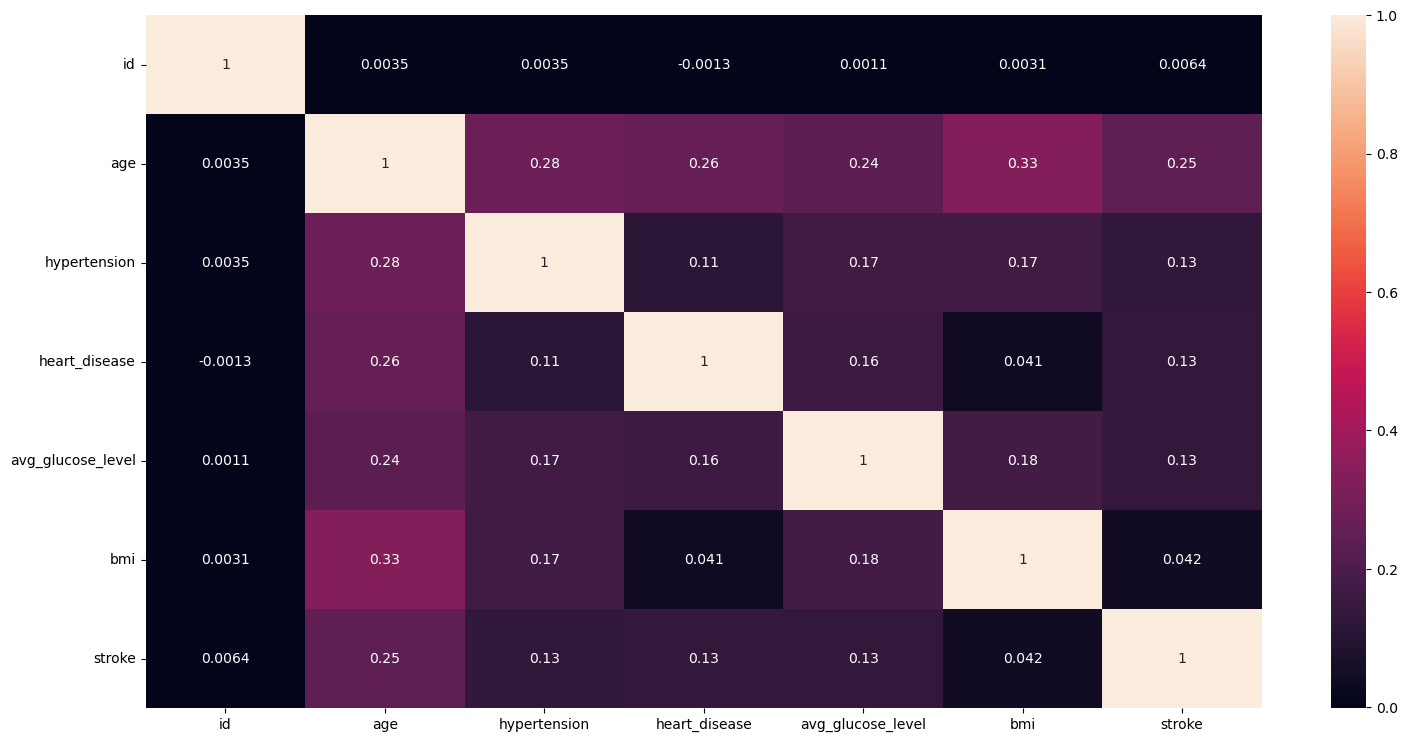

In [9]:
plt.figure(figsize = (18, 9))
sns.heatmap (df.corr(), annot = True)
plt.show()

In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
df=df.drop('id',axis=1)
df.shape

(5110, 11)

In [12]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
def remove_outliers(data):
    arr=[]
    q1=np.percentile(data, 25) 
    q3=np.percentile(data, 75) 
    iqr=q3-q1 
    mi=q1-(1.5*iqr) 
    ma=q3+(1.5*iqr)
    for i in list(data):
        if i<mi:
            i=mi 
            arr.append(i)
        elif i>ma:
            i=ma 
            arr.append(i)
        else:
            arr.append(i)
    return arr

In [16]:
df['bmi'] = remove_outliers (df['bmi'])
df['avg_glucose_level'] = remove_outliers(df['avg_glucose_level'])
print('Outliers successfully removed')

Outliers successfully removed


<Axes: xlabel='avg_glucose_level'>

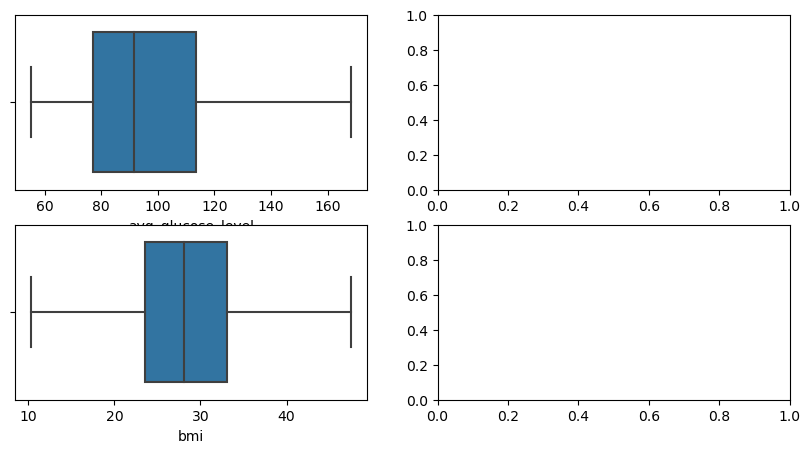

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 5))
sns.boxplot(x = 'bmi', data = df, ax=axes [1][0])
sns.boxplot(x = 'avg_glucose_level', data = df, ax=axes [0][0])

In [18]:
for i in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    print(df[i].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes']


In [19]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
df['Residence_type'] = le1.fit_transform(df['Residence_type'])
df['ever_married'] = le2.fit_transform(df['ever_married'])

In [20]:
import joblib
joblib.dump(le1,"res_transform")
joblib.dump(le2,"mar_transform")

['mar_transform']

In [21]:
df.shape

(4909, 11)

In [22]:
df.iloc[0,:]

gender                          Male
age                             67.0
hypertension                       0
heart_disease                      1
ever_married                       1
work_type                    Private
Residence_type                     1
avg_glucose_level             168.32
bmi                             36.6
smoking_status       formerly smoked
stroke                             1
Name: 0, dtype: object

In [23]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,168.32,36.6,formerly smoked,1
2,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,1,168.32,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,0,168.32,24.0,never smoked,1
5,Male,81.0,0,0,1,Private,1,168.32,29.0,formerly smoked,1


In [24]:
x = df.iloc[:,0:10].values
y = df.iloc[:,10].values

In [25]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer([("onehot", OneHotEncoder (drop= 'first'), [0,5,9])], remainder= "passthrough")
x=ct.fit_transform(x)

In [26]:
joblib.dump(ct,"column")

['column']

In [27]:
x

array([[1.0, 0.0, 0.0, ..., 1, 168.32, 36.6],
       [1.0, 0.0, 0.0, ..., 0, 105.92, 32.5],
       [0.0, 0.0, 0.0, ..., 1, 168.32, 34.4],
       ...,
       [0.0, 0.0, 0.0, ..., 0, 82.99, 30.6],
       [1.0, 0.0, 0.0, ..., 0, 166.29, 25.6],
       [0.0, 0.0, 0.0, ..., 1, 85.28, 26.2]], dtype=object)

In [28]:
x[0]

array([1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 67.0, 0, 1, 1, 1, 168.32,
       36.6], dtype=object)

In [29]:
x.shape

(4909, 15)

In [30]:
y.shape

(4909,)

<Axes: ylabel='count'>

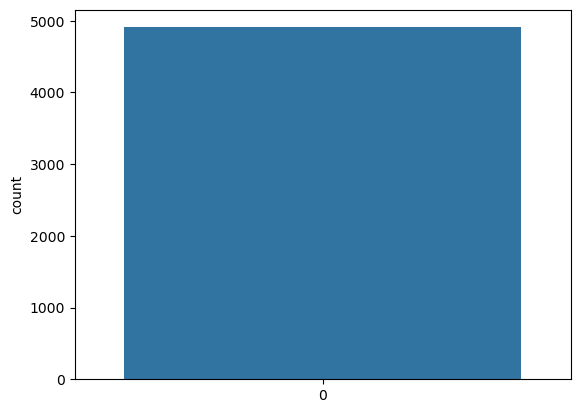

In [31]:
sns.countplot(y)

In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_res, y_res = sm.fit_resample(x,y)
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum (y==0)))

print('After OverSampling, the shape of train_X: {}'.format(x_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format (y_res.shape))

print ("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

Before OverSampling, counts of label '1': 209
Before OverSampling, counts of label '0': 4700 

After OverSampling, the shape of train_X: (9400, 15)
After OverSampling, the shape of train_y: (9400,) 

After OverSampling, counts of label '1': 4700
After OverSampling, counts of label '0': 4700


<Axes: ylabel='count'>

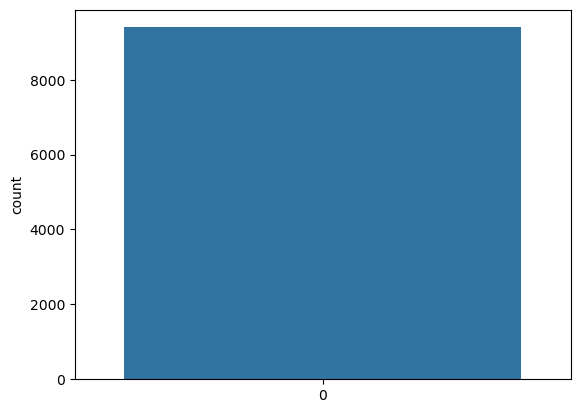

In [34]:
sns.countplot(y_res)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.2, random_state = 42)

In [36]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
print('***Decision Tree Model Results***')
print(confusion_matrix(dtc_pred, y_test))
print(classification_report(dtc_pred, y_test))

***Decision Tree Model Results***
[[873  47]
 [ 49 911]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       920
           1       0.95      0.95      0.95       960

    accuracy                           0.95      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880



In [37]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print('***Random Forest***')
print(confusion_matrix(rf_pred, y_test))
print(classification_report(rf_pred, y_test))

***Random Forest***
[[914  41]
 [  8 917]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       955
           1       0.96      0.99      0.97       925

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880



In [38]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
print(confusion_matrix(lr_pred, y_test))
print('***Logistic Regression***')
print (classification_report(lr_pred, y_test))

[[695 190]
 [227 768]]
***Logistic Regression***
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       885
           1       0.80      0.77      0.79       995

    accuracy                           0.78      1880
   macro avg       0.78      0.78      0.78      1880
weighted avg       0.78      0.78      0.78      1880



In [39]:
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
print('***Support vector classifier***')
print (confusion_matrix(svc_pred, y_test))
print(classification_report(svc_pred, y_test))

***Support vector classifier***
[[633 143]
 [289 815]]
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       776
           1       0.85      0.74      0.79      1104

    accuracy                           0.77      1880
   macro avg       0.77      0.78      0.77      1880
weighted avg       0.78      0.77      0.77      1880



In [40]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
print('***K-Nearest Neighbours***')
print(confusion_matrix(knn_pred, y_test))
print(classification_report(knn_pred, y_test))

***K-Nearest Neighbours***
[[756  25]
 [166 933]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       781
           1       0.97      0.85      0.91      1099

    accuracy                           0.90      1880
   macro avg       0.90      0.91      0.90      1880
weighted avg       0.91      0.90      0.90      1880



In [41]:
cross_valid_scores={}

In [42]:
%%time
parameters = {
"max_depth": [3, 5, 7, 9, 11, 13],
}
model_dtc = DecisionTreeClassifier(
random_state=42,
class_weight='balanced',
)
model_dtc = GridSearchCV(
model_dtc, 
parameters, 
cv=5,
)
model_dtc.fit(x_train, y_train)
model_dtc_pred = model_dtc.predict(x_test)
print('*** Applying Grid Search to Decision tree***')
print(classification_report(model_dtc_pred, y_test))
print(f'Best parameters {model_dtc.best_params_}')
print(
f'Mean cross-validated accuracy score of the best estimator: ' + \
f'{model_dtc.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_dtc.best_score_
print('-----')

*** Applying Grid Search to Decision tree***
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       936
           1       0.95      0.96      0.95       944

    accuracy                           0.95      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880

Best parameters {'max_depth': 13}
Mean cross-validated accuracy score of the best estimator: 0.948
-----
CPU times: total: 484 ms
Wall time: 506 ms


In [43]:
%%time
parameters = {
    "n_estimators": [5, 10, 15, 20, 25],
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
)

model_rf = GridSearchCV(
    model_rf,
    parameters,
    cv=5,
)

model_rf.fit(x_train, y_train)
model_rf_pred = model_rf.predict(x_test)

print('*** Applying Grid Search to Random Forest ***')
print(classification_report(model_rf_pred, y_test))
print(f'Best parameters: {model_rf.best_params_}')
print(f'Mean cross-validated accuracy score of the best_estimator: '+ \
      f'{model_rf.best_score_:.3f}')
cross_valid_scores['random_forest'] = model_rf.best_score_
print('-----')


*** Applying Grid Search to Random Forest ***
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       956
           1       0.96      0.99      0.98       924

    accuracy                           0.98      1880
   macro avg       0.98      0.98      0.98      1880
weighted avg       0.98      0.98      0.98      1880

Best parameters: {'max_depth': 13, 'n_estimators': 25}
Mean cross-validated accuracy score of the best_estimator: 0.973
-----
CPU times: total: 8.55 s
Wall time: 8.59 s


In [44]:
import joblib
joblib.dump(model_rf,"model")

['model']